# 6.5 Machine Learning Part 2

# This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

# 01. Install and import all necessary libraries in your Jupyter notebook.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [13]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [14]:
path = r'C:\Users\peter\Documents\Citibike'

In [15]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'citi_d.csv'))

In [16]:
df.shape

(42993, 20)

In [17]:
df.head()

,Unnamed: 0,day_of_the_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,time_of_day,start_date,end_date,end_hour,start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,Female,Evening & Night,2013-09-09,2013-09-09,18,2013-09-09 18:00:00
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,Male,Evening & Night,2013-09-12,2013-09-12,18,2013-09-12 18:00:00
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,Male,Evening & Night,2013-09-18,2013-09-18,19,2013-09-18 19:00:00
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,Female,Mid-day & Afternoon,2013-09-28,2013-09-28,12,2013-09-28 11:00:00
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,Female,Evening & Night,2013-09-27,2013-09-27,22,2013-09-27 22:00:00


# 02 Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming).
Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.
Also recall that the difference between your variables’ scales can’t be too large or your results will be biased. Make sure you standardize your data first.

In [18]:
# Drop unwanted columns and categorical columns

# Drop specific columns
columns_to_drop = ['Unnamed: 0', 'start_station_id', 'end_station_id', 'day_of_the_week','start_station_name','end_station_name', 'subscriber', 'gender', 'start_time', 'start_date', 'end_date', 'time_of_day']

df_clean = df.drop(columns=columns_to_drop)

In [19]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
0,18,40.754666,-73.991382,40.742388,-73.997262,993,1968.0,18
1,18,40.719392,-74.002472,40.728419,-73.987140,581,1983.0,18
2,19,40.760193,-73.991255,40.768254,-73.988639,361,1989.0,19
3,11,40.743156,-73.974347,40.756014,-73.967416,561,1988.0,12
4,22,40.730287,-73.990765,40.726218,-73.983799,427,1986.0,22


In [20]:
print(df_clean.dtypes)

start_hour                   int64
start_station_latitude     float64
start_station_longitude    float64
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
birth_year                 float64
end_hour                     int64
dtype: object


In [21]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
numerical_columns = ['start_hour', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'birth_year', 'end_hour']
df_clean[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [22]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour
0,0.793598,1.030155,-0.035028,0.424299,-0.486509,0.425070,-0.701594,0.758042
1,0.793598,-0.769729,-0.931846,-0.288323,0.331492,-0.362033,0.669696,0.758042
2,0.996321,1.312157,-0.024805,1.743821,0.210326,-0.782331,1.218212,0.958972
3,-0.625466,0.442829,1.342409,1.119416,1.925312,-0.400242,1.126792,-0.447540
4,1.604491,-0.213828,0.014850,-0.400589,0.601472,-0.656242,0.943954,1.561762


In [23]:
df_clean.shape

(42993, 8)

# 03 Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [25]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\Lib\site-packages\sklearn\clust

[-343944.0000000004,
 -282518.332395797,
 -250033.87873982213,
 -227214.29277411866,
 -209981.12975892035,
 -194466.9062494224,
 -183302.83645053627,
 -175998.50594422527,
 -169520.81567508925]

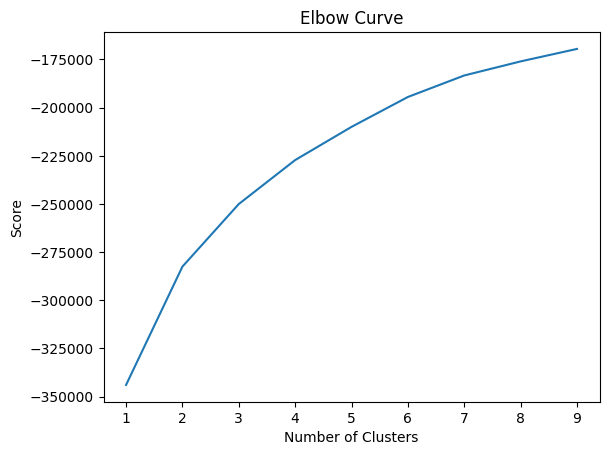

In [26]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 04 - Based on the Elbow curve, there is a significant drop in the within-cluster sum of squares (WCSS) when moving from one to two clusters on the x-axis. After this point, the rate of decrease slows down and the curve becomes more gradual, indicating diminishing returns for adding more clusters. Therefore, the optimal number of clusters appears to be two. This is because the most substantial improvement in clustering quality occurs when increasing from one to two clusters, suggesting that two clusters capture the primary structure in the data.



# 05 Run the k-means algorithm.

In [27]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_clean)

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

# 06 Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [29]:
df_clean['clusters'] = kmeans.fit_predict(df_clean)

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
df_clean.head()

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year,end_hour,clusters
0,0.793598,1.030155,-0.035028,0.424299,-0.486509,0.425070,-0.701594,0.758042,0
1,0.793598,-0.769729,-0.931846,-0.288323,0.331492,-0.362033,0.669696,0.758042,0
2,0.996321,1.312157,-0.024805,1.743821,0.210326,-0.782331,1.218212,0.958972,0
3,-0.625466,0.442829,1.342409,1.119416,1.925312,-0.400242,1.126792,-0.447540,1
4,1.604491,-0.213828,0.014850,-0.400589,0.601472,-0.656242,0.943954,1.561762,0


In [31]:
df_clean['clusters'].value_counts()

clusters
0    24857
1    18136
Name: count, dtype: int64

# 07 Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


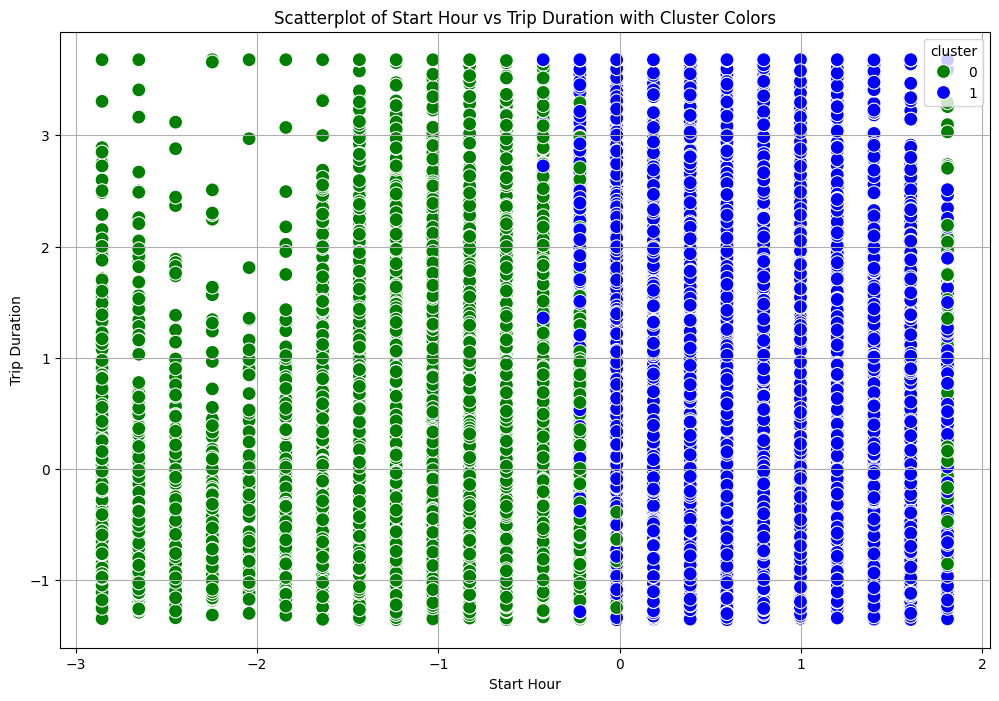

In [33]:
# Define the optimal number of clusters
optimal_k = 2  

# Run K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(df_clean)

# Scatterplot of two numeric variables ('start_hour' vs 'trip_duration') with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='start_hour', y='trip_duration', hue='cluster', data=df_clean, palette=['green', 'blue'], s=100)
plt.xlabel('Start Hour')  # Corrected x-axis label
plt.ylabel('Trip Duration')  # Corrected y-axis label
plt.title('Scatterplot of Start Hour vs Trip Duration with Cluster Colors')
plt.grid(True)  # Optional: Add gridlines if desired
plt.show()

C:\Users\peter\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


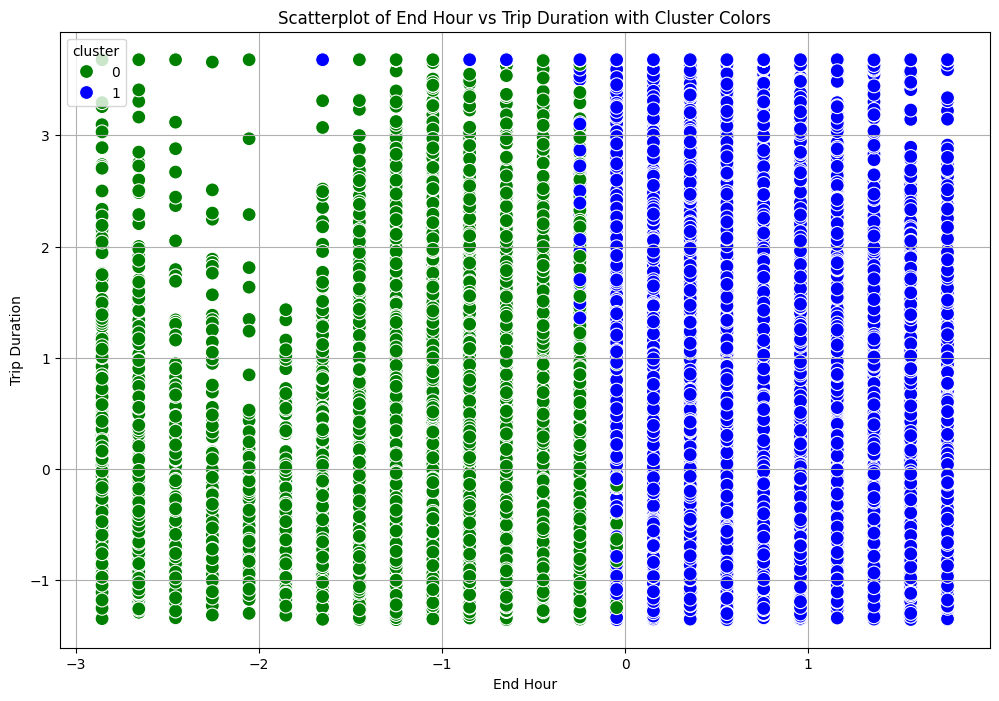

In [34]:
# Define the optimal number of clusters
optimal_k = 2  

# Run K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_clean['cluster'] = kmeans.fit_predict(df_clean)

# Plot the clusters for the 'end_hour' and 'trip_duration' variables
plt.figure(figsize=(12, 8))
sns.scatterplot(x='end_hour', y='trip_duration', hue='cluster', data=df_clean, palette={0: 'green', 1: 'blue'}, s=100)
plt.xlabel('End Hour')
plt.ylabel('Trip Duration')
plt.title('Scatterplot of End Hour vs Trip Duration with Cluster Colors')
plt.grid(True)  # Optional: Add gridlines if desired
plt.show()

# 08 Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

Clusters Analysis:

The scatter plots show two clusters (green and blue) based on the variables 'Start Hour' vs 'Trip Duration' and 'End Hour' vs 'Trip Duration'. Here are some observations and insights about the clusters:

Cluster Separation:

The clusters are well-separated, indicating distinct patterns in the data. The separation is more pronounced along the 'Start Hour' and 'End Hour' axes.
Cluster 0 (green) seems to dominate certain hour ranges while Cluster 1 (blue) dominates others. This suggests that the clustering algorithm has identified specific hours of the day where trip duration patterns differ.
Trip Duration Patterns:

The trip durations for Cluster 0 (green) are spread across a wider range of hours compared to Cluster 1 (blue).
In both 'Start Hour' and 'End Hour' plots, trips with shorter durations are more frequent in Cluster 1 (blue), which could indicate a different type of usage pattern, such as short commutes or quick trips.
Time-Based Behavior:

The clusters might represent different user behaviors based on the time of day. For example, Cluster 1 (blue) could represent peak hours where trips are shorter due to higher demand and possibly more efficient routes. Cluster 0 (green) could represent off-peak hours with longer trips.
Anomalies and Outliers:

There are some data points that do not fit neatly into the general pattern of their cluster, especially in the 'Start Hour' plot. This could indicate outliers or special cases worth investigating further.

# 09 Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [35]:
df_clean.groupby('cluster').agg({'start_hour':['mean', 'median'], 
                         'end_hour':['mean', 'median'], 
                         'trip_duration':['mean', 'median'],
                          'birth_year':['mean', 'median']})

start_hour            end_hour           trip_duration            \
              mean    median      mean    median          mean    median   
cluster                                                                    
0        -0.976375 -1.030912 -0.989617 -1.050330     -0.104616 -0.356302   
1         0.712376  0.590874  0.722038  0.758042      0.076329 -0.224481   

        birth_year            
              mean    median  
cluster                       
0        -0.087860  0.121180  
1         0.064104  0.304019

Findings

Start Hour:

Cluster 0: The mean and median start hours are approximately -0.98 and -1.03, respectively. This indicates that trips in this cluster generally start slightly earlier in the day.
Cluster 1: The mean and median start hours are approximately 0.71 and 0.59, respectively. This suggests that trips in this cluster start slightly later in the day.

End Hour:

Cluster 0: The mean and median end hours are approximately -0.99 and -1.05, respectively. This closely mirrors the start hours, indicating that the trip durations are relatively short.
Cluster 1: The mean and median end hours are approximately 0.72 and 0.76, respectively. This pattern is similar to the start hours, again suggesting short trip durations but slightly later in the day compared to Cluster 0.
Trip Duration:

Cluster 0: The mean trip duration is approximately -0.10, with a median of -0.36. This suggests that trips in this cluster are generally shorter in duration.
Cluster 1: The mean trip duration is approximately 0.08, with a median of -0.22. Trips in this cluster tend to be slightly longer on average compared to Cluster 0, but the median value suggests there are shorter trips as well.

Birth Year:

Cluster 0: The mean birth year is approximately -0.09, with a median of 0.12. This indicates that riders in this cluster tend to be slightly older on average.
Cluster 1: The mean birth year is approximately 0.06, with a median of 0.30. This suggests that riders in this cluster are younger on average compared to Cluster 0.
Interpretation
The clusters reveal distinct patterns in the data:

Time of Day:

Cluster 0 represents trips that start and end slightly earlier in the day, while Cluster 1 represents trips that start and end slightly later. This could indicate different usage patterns, such as commuters versus leisure riders.

Trip Duration:

Trips in Cluster 0 are generally shorter, which might be indicative of quick, possibly routine trips. Cluster 1 has slightly longer trips on average, which could suggest more leisurely or diverse trip purposes.

Rider Age:

Riders in Cluster 0 tend to be older on average, while those in Cluster 1 are younger. This demographic difference might influence the trip characteristics observed in the clusters.

These insights can be valuable for understanding the behavior of different segments of riders and tailoring services or marketing strategies accordingly. If the clusters do not make immediate sense or reveal unexpected patterns, further exploration and refinement of the clustering model might be necessary.

# 10 Propose what these results could be useful for in future steps of an analytics pipeline.

Potential Applications of Clustering Results in Future Analytics Steps
The clustering results provide valuable insights that can be leveraged in various stages of the analytics pipeline to enhance understanding, decision-making, and strategy formulation. Here are some potential applications:

Targeted Marketing and Personalization:

Cluster-Specific Campaigns: Design targeted marketing campaigns that cater to the specific needs and behaviors of different clusters. For instance, Cluster 1 (younger riders with slightly longer trips) could be targeted with promotions for weekend rides or leisure activities.
Personalized Offers: Provide personalized offers and discounts based on the cluster characteristics. Older riders in Cluster 0 might appreciate discounts on routine commute plans or subscription services.
Service Optimization:

Resource Allocation: Allocate resources more efficiently by understanding peak usage times for different clusters. For example, increase bike availability and maintenance services during the peak hours identified for each cluster.
Route Planning: Optimize bike routes and station placements based on the start and end hours of trips. Clusters with different start and end times might benefit from strategically placed stations to reduce travel time.
Product Development:

Feature Enhancement: Develop new features or enhance existing ones based on cluster-specific preferences. For instance, younger riders in Cluster 1 might appreciate integration with social media or gamification elements.
New Services: Introduce new services tailored to cluster needs. Cluster 0 might benefit from a loyalty program that rewards frequent, short trips.
Customer Experience Improvement:

Feedback Collection: Collect feedback specifically from different clusters to understand their unique pain points and preferences. Tailored surveys or feedback forms can provide deeper insights.
User Interface Customization: Customize the user interface of mobile apps or websites to better serve the needs of different clusters. For example, an easy-to-navigate interface for older users in Cluster 0.
Operational Efficiency:

Demand Forecasting: Use cluster data to forecast demand more accurately. Understanding the patterns in trip duration and start/end hours helps in predicting future usage trends.
Maintenance Scheduling: Schedule maintenance activities based on the usage patterns of different clusters to minimize disruptions. High-usage periods identified in the clusters can be avoided for maintenance.
Safety and Compliance:

Safety Initiatives: Implement safety initiatives targeting specific clusters. For example, younger riders in Cluster 1 might benefit from safety workshops or training sessions.
Regulatory Compliance: Ensure that services comply with regulations by understanding the demographic makeup of clusters. Tailored communication can help in adhering to age-specific regulations.
Data-Driven Decision Making:

Strategic Planning: Incorporate cluster insights into strategic planning processes. This can include expansion plans, partnership opportunities, and long-term investment decisions.
Performance Monitoring: Continuously monitor the performance of different clusters to identify areas for improvement and measure the impact of implemented strategies.
Next Steps in the Analytics Pipeline:
Validation and Refinement:

Validate the clustering results with additional metrics such as silhouette score or Davies-Bouldin index.
Refine the clustering model by exploring additional features or trying different clustering algorithms.
Integration with Other Data Sources:

Integrate cluster data with other relevant data sources such as weather data, traffic information, or event schedules to gain a more comprehensive understanding.
Advanced Analytics:

Conduct advanced analytics such as predictive modeling or time series analysis to forecast future trends and identify emerging patterns.
Reporting and Visualization:

Develop detailed reports and interactive visualizations to communicate the findings to stakeholders. Use dashboards to provide real-time insights.
By leveraging these clustering results, organizations can enhance their understanding of user behavior, optimize their operations, and provide better services to their customers.